<a href="https://colab.research.google.com/github/Lul4t3ch/Sentiment-analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [2]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.15.0'

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
path = "/content/gdrive/MyDrive/DIO/files (1).zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall('./')
zip_object.close


<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/MyDrive/DIO/files (1).zip' mode='r'>>

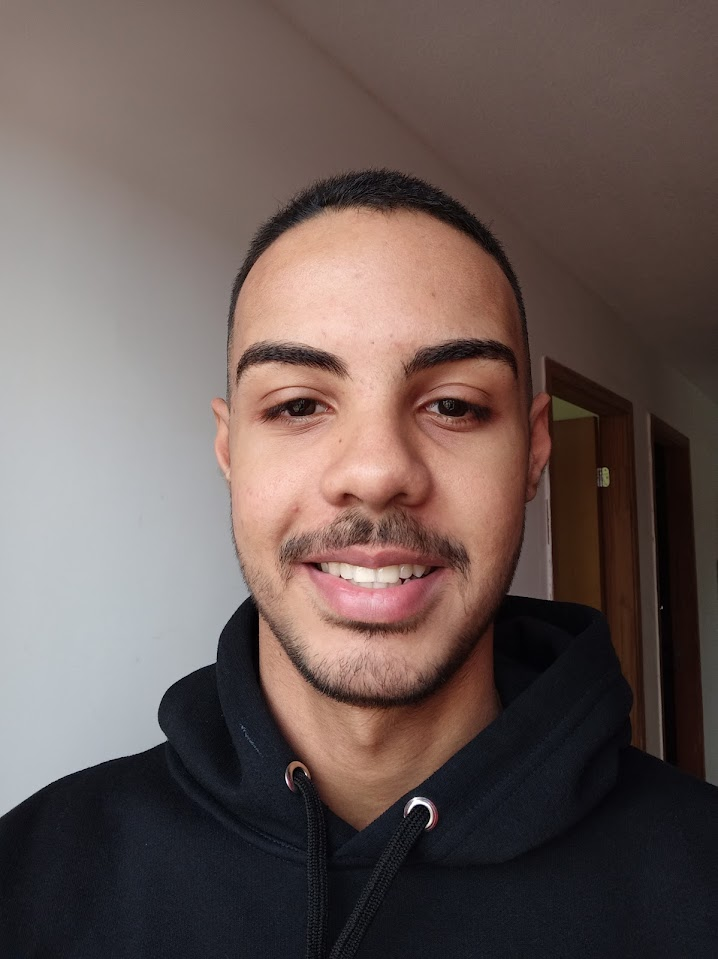

In [14]:
image = cv2.imread('/content/gdrive/MyDrive/DIO/test_image.jpg')
cv2_imshow(image)

In [15]:
image.shape

(959, 718, 3)

In [16]:
cascade_faces = "Material/haarcascade_frontalface_default.xml"
model_path = "Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
emotions_classifier = load_model(model_path, compile = False)
expressions = ["Anger", "Disgust", "Fear", "Happy", "Sad", "Surprised", "Neutral"]

In [17]:
original = image.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20,20))

In [18]:
faces

array([[147, 225, 445, 445]], dtype=int32)

In [19]:
len(faces)


1

In [20]:
faces.shape


(1, 4)

Extraction of ROI (region of interest)


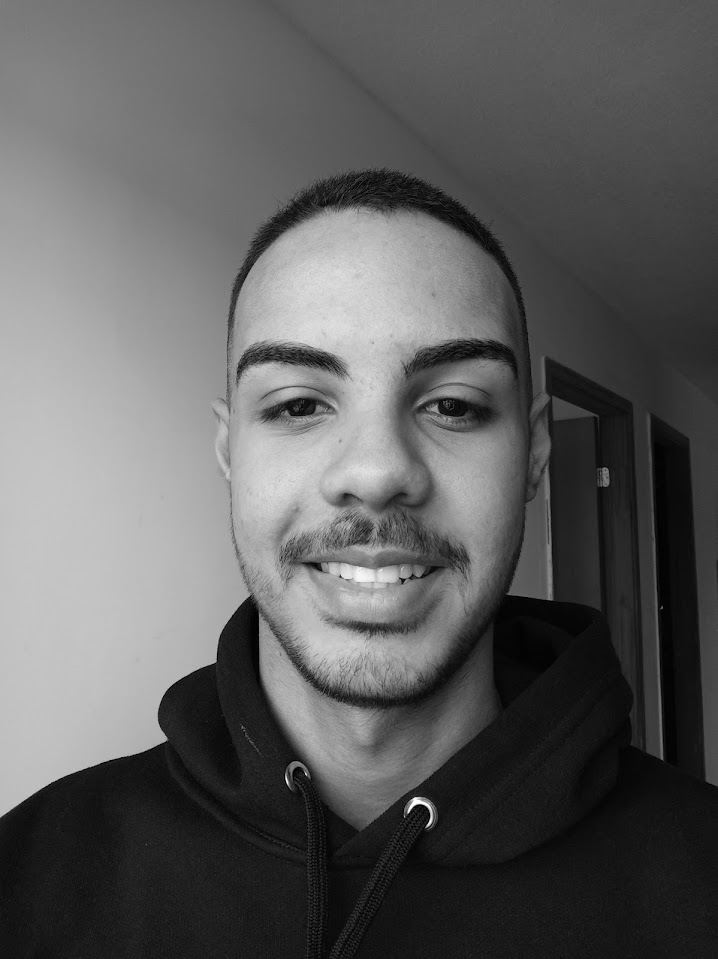

In [21]:
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [22]:
gray.shape


(959, 718)

In [60]:
roi = gray[230:300 + 350, 230:300 + 220]


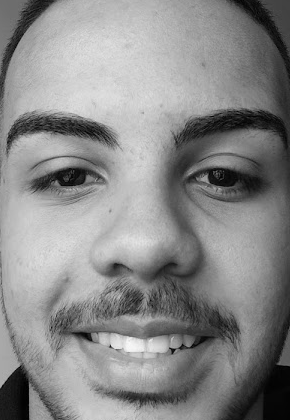

In [61]:
cv2_imshow(roi)


In [62]:
roi.shape


(420, 290)

array([[110, 110, 110, ...,  65,  65,  65],
       [110, 110, 110, ...,  65,  65,  65],
       [110, 110, 110, ...,  66,  66,  66],
       ...,
       [ 27,  29,  27, ...,   4,   4,   4],
       [ 28,  30,  26, ...,   4,   4,   4],
       [ 29,  32,  26, ...,   4,   4,   4]], dtype=uint8)
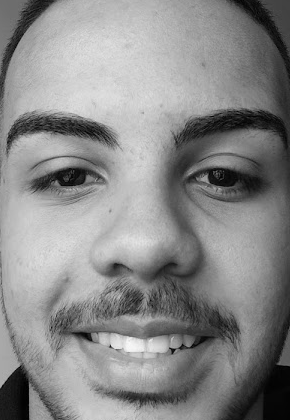

In [63]:
roi

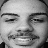

In [64]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [65]:
roi.dtype


dtype('uint8')

In [66]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [67]:
roi

array([[110., 109., 109., ...,  68.,  67.,  66.],
       [112., 110., 110., ...,  68.,  68.,  65.],
       [115., 113., 106., ...,  56.,  68.,  66.],
       ...,
       [ 25.,  28.,  17., ...,   7.,   7.,   4.],
       [ 28.,  25.,  22., ...,   5.,   5.,   4.],
       [ 27.,  25.,  18., ...,   5.,   5.,   4.]])

In [68]:
roi = roi / 255


In [69]:
roi

array([[0.43137255, 0.42745098, 0.42745098, ..., 0.26666667, 0.2627451 ,
        0.25882353],
       [0.43921569, 0.43137255, 0.43137255, ..., 0.26666667, 0.26666667,
        0.25490196],
       [0.45098039, 0.44313725, 0.41568627, ..., 0.21960784, 0.26666667,
        0.25882353],
       ...,
       [0.09803922, 0.10980392, 0.06666667, ..., 0.02745098, 0.02745098,
        0.01568627],
       [0.10980392, 0.09803922, 0.08627451, ..., 0.01960784, 0.01960784,
        0.01568627],
       [0.10588235, 0.09803922, 0.07058824, ..., 0.01960784, 0.01960784,
        0.01568627]])

In [70]:
roi = img_to_array(roi)


In [71]:
roi


array([[[0.43137255],
        [0.42745098],
        [0.42745098],
        ...,
        [0.26666668],
        [0.2627451 ],
        [0.25882354]],

       [[0.4392157 ],
        [0.43137255],
        [0.43137255],
        ...,
        [0.26666668],
        [0.26666668],
        [0.25490198]],

       [[0.4509804 ],
        [0.44313726],
        [0.41568628],
        ...,
        [0.21960784],
        [0.26666668],
        [0.25882354]],

       ...,

       [[0.09803922],
        [0.10980392],
        [0.06666667],
        ...,
        [0.02745098],
        [0.02745098],
        [0.01568628]],

       [[0.10980392],
        [0.09803922],
        [0.08627451],
        ...,
        [0.01960784],
        [0.01960784],
        [0.01568628]],

       [[0.10588235],
        [0.09803922],
        [0.07058824],
        ...,
        [0.01960784],
        [0.01960784],
        [0.01568628]]], dtype=float32)

In [72]:
roi.shape


(48, 48, 1)

In [73]:
roi = np.expand_dims(roi, axis = 0)


In [74]:
roi.shape


(1, 48, 48, 1)

Predictions

In [75]:
predsim = emotions_classifier.predict(roi)[0]


1/1 [==============================] - 0s 429ms/step


In [77]:
predsim

array([5.0939020e-06, 2.2673484e-10, 5.5201785e-06, 9.9886119e-01,
       2.1776461e-05, 3.0647634e-06, 1.1033459e-03], dtype=float32)

In [78]:
len(predsim)


7

In [80]:
emotion_probability = np.max(predsim)
emotion_probability

0.9988612

In [82]:
predsim.argmax()


3

In [83]:
label = expressions[predsim.argmax()]
label

'Happy'

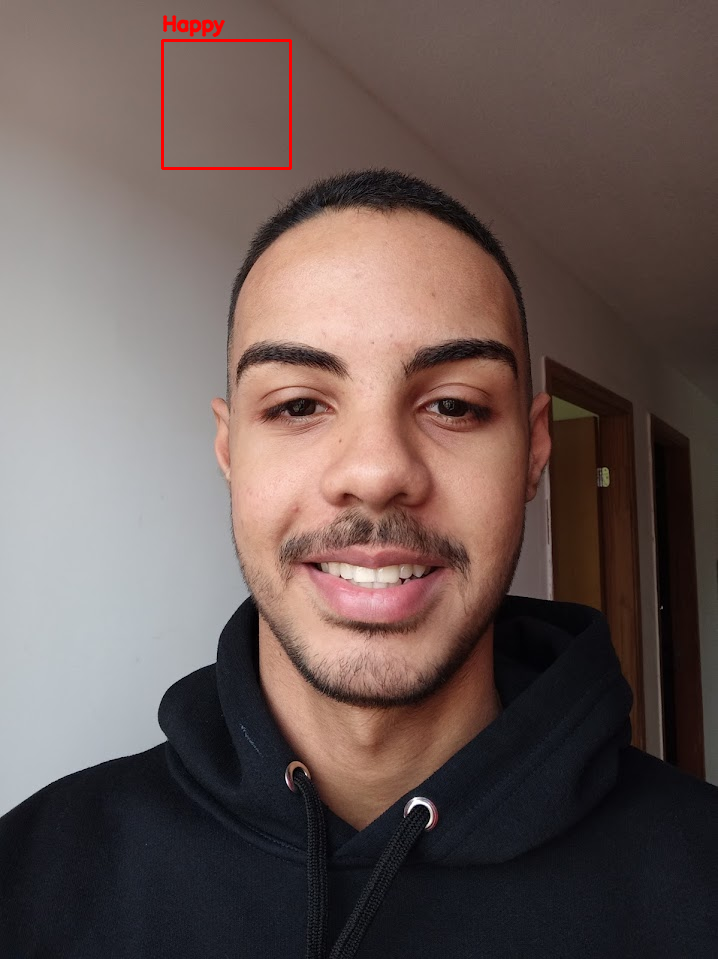

In [84]:
cv2.putText(original, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
cv2_imshow(original)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
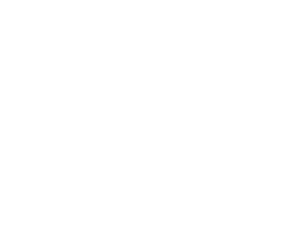

In [85]:
probabilidades = np.ones((250,300,3), dtype= 'uint8') * 255
probabilidades


In [87]:
probabilidades.shape


(250, 300, 3)

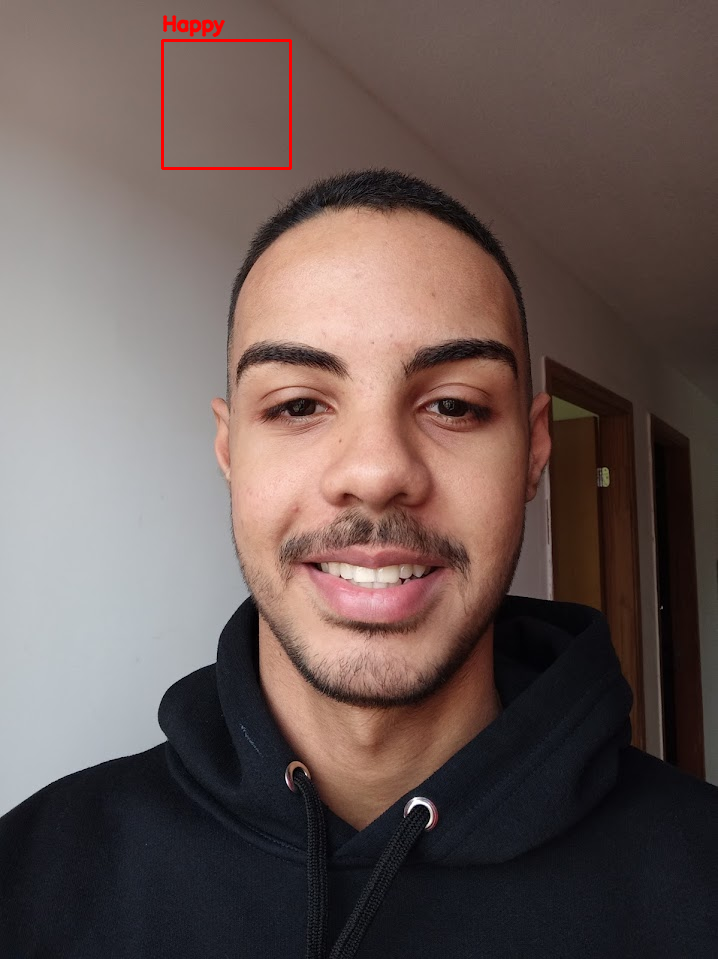

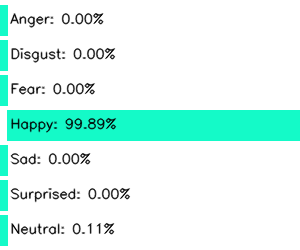

In [90]:
cv2_imshow(original)
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressions, predsim)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probabilidades)